In [1]:
# 比较不同特征子集并画出重要度图
import numpy as np
np.random.seed(1234)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot as plt
# 解决中文和负号显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 使显示图标自适应
plt.rcParams['figure.autolayout'] = True


d:\anconda\lib\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
length1= 1350 
length2= 1650
data = "HangSeng"
def load_data():
    target_stock = pd.read_csv("./dataset/n5_"+data+".csv")
    y_train= target_stock[1:length1]["trend"]
    y_test = target_stock[length1:length2-1]["trend"]
    y_valid = target_stock[length2:-1]["trend"]
    x_train = target_stock[0:length1-1]
    x_test = target_stock[length1-1:length2-2]
    x_valid = target_stock[length2-1:-2]
    # 归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    x_valid = scaler.fit_transform(x_valid)
    return x_train,y_train,x_test,y_test,x_valid,y_valid

In [3]:
def eval(y_valid,y_pre):
    TP, FN, FP, TN = 0,0,0,0
    for i, j in zip(y_valid,y_pre):
        if i==1 and j==1:
            TP += 1
        if i==1 and j==-1:
            FN += 1
        if i==-1 and j==1:
            FP += 1
        if i==-1 and j==-1:
            TN += 1

    accuracy=(TP+TN)/(TP+TN+FP+FN)*100
    precision=TP/(TP+FP)*100
    recall=TP/(TP+FN)*100
    F1=2*((precision*recall)/(precision+recall))
    auc = roc_auc_score(y_valid,y_pre)*100
    return accuracy,precision,recall,F1,auc
def aim():
    x_train,y_train,x_test,y_test,x_valid,y_valid = load_data()
    svc_clf = XGBClassifier()
    svc_clf.fit(x_train,y_train)
    y_pre = svc_clf.predict(x_valid)
    acc = eval(y_valid,y_pre)
    f = open ('./实验结果/SetCompare_.txt','a')
    print(data,file = f)
    print ("Accuracy:%.2f, F1-score:%.2f, AUC:%.2f, NumofFeature:%d"%(acc[0],acc[3],acc[4],x_train.shape[1]),file = f)
    f.close()


In [ ]:
# aim()

['trend', 'BOLLM', 'APO', 'CCI', 'DX', 'MACDFIX', 'MINUS_DI', 'ROCP', 'STOH', 'ADOSC', 'HT_TRENDLINE']


<Figure size 6000x4800 with 0 Axes>

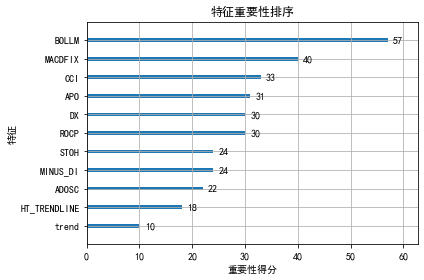

In [5]:
target_stock = pd.read_csv("./dataset/n11_"+data+".csv")

y_train= target_stock[1:length1]["trend"]
y_test = target_stock[length1:length2-1]["trend"]
y_valid = target_stock[length2:-1]["trend"]
x_train = target_stock[0:length1-1]
x_test = target_stock[length1-1:length2-2]
x_valid = target_stock[length2-1:-2]
# 归一化
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_valid = scaler.fit_transform(x_valid)
feature_names = target_stock.columns.tolist()
print(feature_names)
model = XGBClassifier()
dtrain = xgb.DMatrix(x_train,y_train,feature_names=feature_names)
# xgb.fit(x_train,y_train)
model = xgb.train({},dtrain)
plt.figure(figsize=(10,8),dpi=600)
f_fig = plot_importance(model,title='特征重要性排序', xlabel='重要性得分', ylabel='特征')
f_fig.figure.savefig("./实验结果/Feature importance.svg",dpi=600)
plt.show()

In [30]:
# 生成18个数据集
from talib.abstract import *
import pandas as pd
target_stock = pd.read_csv("./dataset/n5_HangSeng.csv")
inputs = {
    'open': target_stock["Open"].values,
    'high': target_stock["High"].values,
    'low': target_stock["Low"].values,
    'close': target_stock["Close"].values,
    'volume': target_stock["Volume"].values
}
macd,macdsignal,macdhist = MACD(inputs)
bu,bm,bl = BBANDS(inputs)
target_stock['MACD']=macd
target_stock['CCI']=CCI(inputs)
target_stock['ATR']=ATR(inputs)
target_stock['BBANDS']=bm
target_stock['EMA20']=EMA(inputs,timeperiod=20)
target_stock['MA10'] = MA(inputs,timeperiod=10)
target_stock['MA5'] = MA(inputs,timeperiod=5)
target_stock['MOM6'] = MOM(inputs,timeperiod=6)
target_stock['MOM12'] = MA(inputs,timeperiod=12)
target_stock['ROC'] = MA(inputs)
target_stock['CMO'] = CMO(inputs)
target_stock['WILLR'] = WILLR(inputs)
target_stock.to_csv("./dataset/n18_HangSeng.csv")  # 产生更多的数据